
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Tuesday, October 2nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).**

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name : Akhilesh Reddy Narapareddy  
### UT EID: an27467

# Question 0. Bias-variance (15pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [81]:
import numpy as np

data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
x_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)

data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
x_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1].reshape(-1, 1)

We want to build a model that can predict y for unknown inputs x.

(a) (5pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

Populating the interactive namespace from numpy and matplotlib
Coefficients: 
 [[5.48040496]]
Mean squared error(MSE) : 6455.71


C:\Users\Akhil\Anaconda2\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors', 'e', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


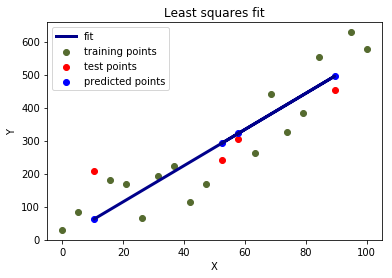

In [82]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
%pylab inline

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train,y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)

# Make predictions using the in sample set
y_pred = regr.predict(x_test)

print("Mean squared error(MSE) : %.2f"
      % mean_squared_error(y_test,y_pred))

plt.scatter(x_train,y_train, marker='o', color='darkolivegreen', linestyle='None',label = 'training points')
plt.scatter(x_test,y_test, marker='o', color='red', linestyle='None',label = 'test points')
plt.scatter(x_test, y_pred, color='blue', linestyle='None',label = 'predicted points')
plt.plot(x_test, y_pred, color='darkblue', linewidth=3,label = 'fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(numpoints=1, loc='best')
plt.title('Least squares fit')
plt.show()


(b) (5pts) Fit polynomial models of degrees 1,2,3 and 5 to the training data, and report mean squared error for both models. Plot the data, the fitted models, and the predicted outputs.

Degree :  1
Mean squared error(MSE) : 6455.71
Degree :  2
Mean squared error(MSE) : 4683.31
Degree :  3
Mean squared error(MSE) : 4602.20
Degree :  5
Mean squared error(MSE) : 6599.13


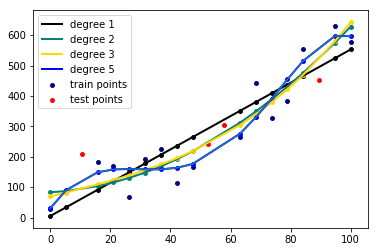

In [83]:
from sklearn.linear_model import LinearRegression
plt.scatter(x_train,y_train, color='navy', s=15, marker='o', label="train points")
plt.scatter(x_test,y_test,s=15,marker='o', color='red', linestyle='None',label = 'test points')

colors = ['black','teal','gold','blue']
for count, degree in enumerate([1,2,3,5]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train, y_train)
    pred = model.predict(x_train)
    y_plot = model.predict(x_test)
    print('Degree : ',degree)
    print("Mean squared error(MSE) : %.2f"
          % mean_squared_error(y_test,y_plot))
    
    new_X, new_y = zip(*sorted(zip(x_train, pred)))
    plt.plot(new_X,new_y, color=colors[count], linewidth=2,
             label="degree %d" %degree)
    plt.scatter(new_X,new_y, s=15,color=colors[count], marker='o',linestyle='None')
 # sort values for plotting
plt.plot(new_X, new_y)


plt.legend(loc='upper left') 

plt.show()

**(c) (5pts) Which model performed the best? Explain using the bias-variance tradeoff.**  
Model with degree 3 performs the best among all the models. This is because the simpler models have higher bias and has a higher error and does not fit the data well. By fitting higher polynomials, we are increasing the complexity of the model, thereby increasing the variance of the model. At a certain point, 3rd degree polynomial in our case, the total error becomes the minimum and then increases as the error due to the variance dominates the model

# Question 1. Data Exploration (20pts)
Use the following code to import the dataset.

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
data = pd.read_csv('data_q1.csv', index_col=0)

The columns are:
  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)

We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

(a) (1pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows.

In [85]:
print(data.shape)
data.head(5)

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


(b) (4pts) Generate box-plots for each of the four columns and identify the cutoff values for outliers.

Outlier cutoff values for TV -142.3 435.5
Outlier cutoff values for Radio -29.85 76.35
Outlier cutoff values for Newspaper -35.78 93.62
Outlier cutoff values for Sales -0.16 27.94


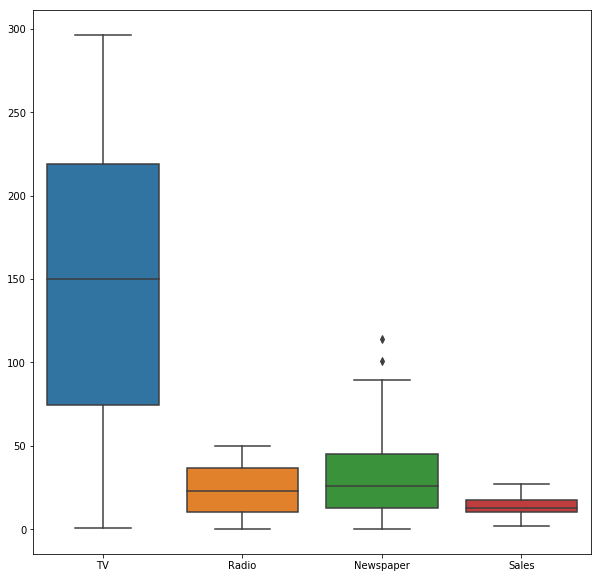

In [86]:
import seaborn as sns

fig,ax = plt.subplots(figsize = (10,10))
sns.boxplot(data = data)

temp = data['Newspaper']
temp

def cutoff_values(i):
    q75, q25 = np.percentile(data[i], [75 ,25])
    iqr = q75 - q25

    min = round(q25 - (iqr*1.5),2)
    max = round(q75 + (iqr*1.5),2)
    print('Outlier cutoff values for %s'%i,min,max)

cutoff_values('TV')
cutoff_values('Radio')
cutoff_values('Newspaper')
cutoff_values('Sales')

**The minimum cutoff value can also be 0 as the spending cannot go below 0**

(c) (4pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.

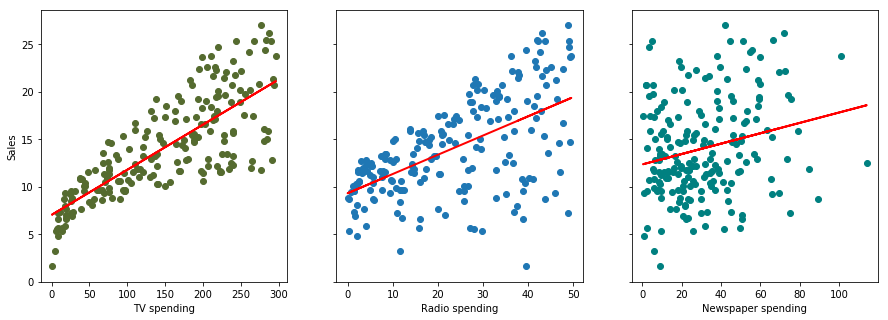

In [87]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,5),sharey = True)
ax1.scatter(data['TV'],data['Sales'],color = 'darkolivegreen')
ax1.set_xlabel('TV spending')
ax1.set_ylabel('Sales')
train1 = np.array(data['TV']).reshape(-1,1)
reg1 = linear_model.LinearRegression()
reg1.fit(train1,data['Sales'])
ax1.plot(train1,reg1.predict(train1),color='red',linewidth=2)

ax2.scatter(data['Radio'],data['Sales'])
ax2.set_xlabel('Radio spending')
train2 = np.array(data['Radio']).reshape(-1,1)
reg2 = linear_model.LinearRegression()
reg2.fit(train2,data['Sales'])
ax2.plot(train2,reg2.predict(train2),color='red',linewidth=2)

ax3.scatter(data['Newspaper'],data['Sales'],color = 'teal')
ax3.set_xlabel('Newspaper spending')
train3 = np.array(data['Newspaper']).reshape(-1,1)
reg3 = linear_model.LinearRegression()
reg3.fit(train3,data['Sales'])
ax3.plot(train3,reg3.predict(train3),color='red',linewidth=2)

By plotting the scatter plots and the fit lines, we can observe that there is an observable correlation between TV spending and Sales and Radio spending and Sales. But with respect to the newspaper spending, although the fit line shows an increasing slope, there is no visible pattern between Newspaper spending and sales.

(d) (4pts) Fit a simple linear regression of 'Sales' on 'TV'. What is the regression coefficient for 'TV'? What is its interpretation?

In [88]:

train1 = np.array(data['TV']).reshape(-1,1)

# Creating the linear regression object
reg1 = linear_model.LinearRegression()

# Fitting the model
reg1.fit(train1,data['Sales'])

print('Regression coefficient for TV :',round(reg1.coef_[0],3))


Regression coefficient for TV : 0.048


**Interpretation:**  
For every $1000 increase in TV advertising spend, we can expect an increase in sales by 48 widgets

Now split the data randomly into a training and test set (keep one third of the data for test), using train_test_split from sklearn. Use test_size as 0.33 and random_state as 42.

(e) (4pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. (Sales is the dependent variable)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
X_train,X_test,Y_train,Y_test = train_test_split(data[['TV','Radio','Newspaper']],data['Sales'],test_size = 0.33,random_state = 42)

# Creating the linear regression object
reg1 = linear_model.LinearRegression()

# Fitting the model
reg1.fit(X_train,Y_train)

predict_test = reg1.predict(X_test)
rmse_test = sqrt(mean_squared_error(Y_test,predict_test))
print('Root mean squared error : % .2f'% rmse_test)

Root mean squared error :  1.93


(f) (2pts) Report the MSE obtained on train data. How much does this increase when you score your model on test data?

In [90]:
predict_train = reg1.predict(X_train)
mse_train = mean_squared_error(Y_train,predict_train)
mse_test = mean_squared_error(Y_test,predict_test)
print('Mean squared error(on train data) : %.2f'% mean_squared_error(Y_train,predict_train))
print('MSE increased by %.2f after scoring on test data'%(mse_test-mse_train))

Mean squared error(on train data) : 2.41
MSE increased by 1.32 after scoring on test data


(g) (1pts) Report the coefficients obtained by your model.

Coefficients of the MLR model on all the features:

In [91]:
reg1.coef_

array([0.04466512, 0.19663006, 0.00607439])

# Question 2. Regression (25pts)

Use the following dataset for this question. Split the dataset into train and test set(already done for you.)


In [92]:
import pandas as pd
import numpy as np
from sklearn import datasets
diabetes = datasets.load_diabetes()

X = diabetes.data
Y = diabetes.target

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state=10)

a) (2 points) Fit an MLR, using ordinary least squares, on all the feature variables using the training data. Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

In [94]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

def fitting_mlr(X_train,y_train,X_test,y_test):
    # Creating the linear regression object
    reg1 = linear_model.LinearRegression()

    # Fitting the model
    reg1.fit(X_train,y_train)

    predict_test = reg1.predict(X_test)
    rmse_test = sqrt(mean_squared_error(y_test,predict_test))

    predict_train = reg1.predict(X_train)
    rmse_train = sqrt(mean_squared_error(y_train,predict_train))
    print('Root mean squared error(on train data) : %.2f'%rmse_train )
    print('Root mean squared error(on test data) : %.2f'%rmse_test )
    return predict_test,y_test - predict_test

predictions_mlr, residuals_mlr = fitting_mlr(X_train,y_train,X_test,y_test)

Root mean squared error(on train data) : 52.01
Root mean squared error(on test data) : 57.43


Increase in RMSE after scoring on test data : 5.42

b)  (3 points) Now fit the regression model using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

In [95]:
def fitting_huber(X_train,y_train,X_test,y_test):
    # Fitting huber regressor
    huber = linear_model.HuberRegressor(alpha=0.0).fit(X_train, y_train)

    predict_test_huber = huber.predict(X_test)
    rmse_test_h = sqrt(mean_squared_error(y_test,predict_test_huber))

    predict_train_huber = huber.predict(X_train)
    rmse_train_h = sqrt(mean_squared_error(y_train,predict_train_huber))
    print('Root mean squared error(on train data) - Huber : %.2f'%rmse_train_h)
    print('Root mean squared error(on test data) - Huber : %.2f'%rmse_test_h)
    return predict_test_huber,y_test - predict_test_huber

#     print('RMSE increased by %.2f after scoring on test data'%(rmse_test_h-rmse_train_h))
predictions,residuals = fitting_huber(X_train,y_train,X_test,y_test)

Root mean squared error(on train data) - Huber : 52.17
Root mean squared error(on test data) - Huber : 57.16


Now we will introduce outlier in the training set and train our model to see how the model performs. (Code provided)

c) (2 points ) Fit the MLR model on X_train and y_train_outlier and calculate the RMSE on train and test set.

In [96]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 5000.0

In [97]:
predictions_mlr,residuals_mlr = fitting_mlr(X_train,y_train_outliers,X_test,y_test)

Root mean squared error(on train data) : 286.26
Root mean squared error(on test data) : 82.22


d) (3 points) Fit the regression model with Huber loss on X_train and y_train_outier. Calculate the RMSE on train and test set. Compare the RMSE of both the models.

In [98]:
predictions_h,residuals_h = fitting_huber(X_train,y_train_outliers,X_test,y_test)

Root mean squared error(on train data) - Huber : 290.22
Root mean squared error(on test data) - Huber : 57.57


There is no considerable decrease in RMSE when scored on train data. However, we can see a 30% reduction in rmse when scoring on test data

e) (5 points) Calculate the residuals on the test set for both the models obtained in (c) and (d). Plot the scatter plot of residual vs fitted value for both the models. What do you observe? Which model looks better?

Text(0,0.5,'Residuals')

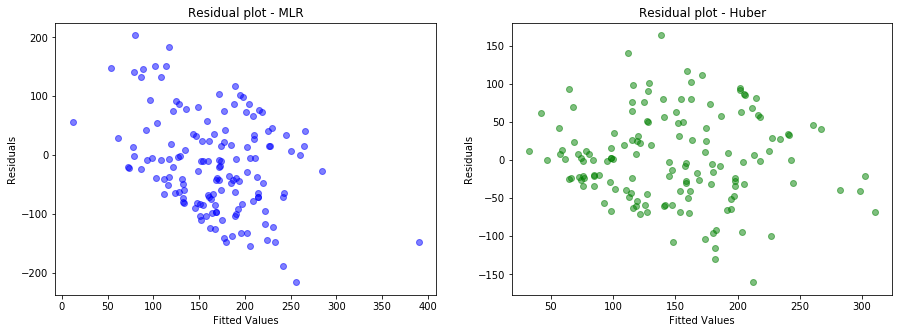

In [99]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
ax1.scatter(predictions_mlr,residuals_mlr,c = 'b',alpha = 0.5)
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual plot - MLR')
    
ax2.scatter(predictions_h,residuals_h,c = 'g',alpha = 0.5)
ax2.set_title('Residual plot - Huber')
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')

**Observation:**  
**MLR residual plot:**  
There is a clear pattern in the MLR residual plot showing that there is still scope for improvement in the model and the outliers are resulting in a model that creates residuals that are not centered around zero as we expect  
**Huber residual plot:**    
We can see that Huber regression has done a pretty good at handling the outliers as the residuals are centered aroung the zero value with no clear patter. This shows that the predictions that we made on the data are decently accurate and there are no systematic errors in the predictions

Now we will do feature selection. The features of X matrix are named as x1,x2,.... . We have created a list feature_name which stores the feature name (Code provided). So x1 means the first column of X, x2 means the second column of X and so on.

f) (5 points ) Backward Selection: Find the three most significant factors using backward feature selection. You may find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html. Use X_train and y_train for your model.

In [100]:
feature_name = ['x'+str(i) for i in range(1,11)]

from sklearn.feature_selection import RFE
estimator = linear_model.LinearRegression()
selector = RFE(estimator, 3, step=1)
selector = selector.fit(X_train, y_train)

imp_features = []
for index,i in enumerate(selector.support_):
     if i == True:
            imp_features.append(feature_name[index])
print('Top 3 significant features using backward feature selection : ',imp_features)

Top 3 significant features using backward feature selection :  ['x3', 'x5', 'x9']


g) (5 points) Forward Selection: Find the three most significant feature using forward selection. Check if it is same as the ones you got in part (f). Use X_train and y_train for your model. Hint : Use a for loop to implement forward feature selection

In [101]:
def mlr(X_train,X_test,y_train,y_test):
    # Creating the linear regression object
    reg1 = linear_model.LinearRegression()

    # Fitting the model
    reg1.fit(X_train,y_train)

    predict_train = reg1.predict(X_train)
    rmse_test = sqrt(mean_squared_error(y_train,predict_train))
    return rmse_test

# Final version:
def forward_selection(X_train,X_test,y_train,y_test,features,no_of_sig):
    all_features = features.copy()
    sig_features = []
    while len(sig_features)<=(no_of_sig-1):
        rmse_list = []
        for i in all_features:
            temp = sig_features.copy()
            temp.append(i)
            rmse_list.append(mlr(X_train[:,temp],X_test[:,temp],y_train,y_test))
        best_ft_idx = rmse_list.index(min(rmse_list))
        sig_features.append(all_features[best_ft_idx])
        del all_features[best_ft_idx]
    sig_features_f = ['x'+str(i+1) for i in sig_features]
    print('Top 3 significant features using forward feature selection : ',sig_features_f)
        
features = [0,1,2,3,4,5,6,7,8,9]
sig_features_f = forward_selection(X_train,X_test,y_train,y_test,features,3)


Top 3 significant features using forward feature selection :  ['x3', 'x9', 'x5']


# Question 3. Sampling (5pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

(a) (2pts) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

(b) (2pts) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?

(c) (1pts) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.

## Answer

(a) (2pts) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

In [102]:
# Estimated population : 30%
# Confidence interval : 90%
# Error : +- 0.09

p = 0.3
z = 1.65
e = 0.09
print('Minimum sample size requried : ',round(p*(1-p)*(z/e)**2))


Minimum sample size requried :  71


(b) (2pts) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?

In [103]:
p = 0.3
z = 1.96
e = 0.09
print('Minimum sample size requried : ',round(p*(1-p)*(z/e)**2))

Minimum sample size requried :  100


(c) (1pts) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.

In [104]:
p = 0.5
z = 1.96
e = 0.09
print('Minimum sample size requried : ',round(p*(1-p)*(z/e)**2))

Minimum sample size requried :  119


# Question 4. Principal Component Analysis (10pts)

Use the following code to read in data of US Imports.

In [105]:
import pandas as pd

df = pd.read_csv('data_q4.csv', index_col=0)
df.head()

,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton","Apparel,household goods-nontextile","Artwork, antiques, stamps, etc.",Automotive tires and tubes,Bakery products,Bauxite and aluminum,...,Toiletries and cosmetics,"Toys, games, and sporting goods","Trucks, buses, and special purpose vehicles","U.S. goods returned, and reimports",Vegetables,"Vessels, except scrap","Wine, beer, and related products","Wood, glass, plastic","Wool, silk, etc.",Zinc
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0,2720.0,402303.0,0.0,12081.0,0.0,...,0.0,0.0,0.0,6156613.0,25873.0,0.0,61741.0,8474.0,3350.0,0.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0,889107.0,286011.0,0.0,0.0,182556.0,...,4446.0,0.0,0.0,66682.0,519964.0,0.0,14112.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,20217.0,0.0,0.0,0.0,...,22947.0,0.0,0.0,29474254.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0,3683.0,0.0,0.0,0.0,4741.0,...,0.0,0.0,0.0,67589.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0,0.0,6412.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2992.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
df_scaled = pd.DataFrame(stdScaler.fit_transform(df))
df_scaled.columns = df.columns
df_scaled.set_index(df.index, inplace = True)
df_scaled

,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton","Apparel,household goods-nontextile","Artwork, antiques, stamps, etc.",Automotive tires and tubes,Bakery products,Bauxite and aluminum,...,Toiletries and cosmetics,"Toys, games, and sporting goods","Trucks, buses, and special purpose vehicles","U.S. goods returned, and reimports",Vegetables,"Vessels, except scrap","Wine, beer, and related products","Wood, glass, plastic","Wool, silk, etc.",Zinc
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.234262,-0.158833,-0.185706,-0.145710,-0.126080,-0.110251,-0.190476,-0.215061,-0.129567,-0.128565,...,-0.200362,-0.087080,-0.076935,-0.237328,-0.121174,-0.117536,-0.176750,-0.188185,-0.225061,-0.093190
Albania,-0.234279,-0.158657,-0.183236,-0.145262,-0.125342,-0.107925,-0.190850,-0.215061,-0.129604,-0.128116,...,-0.200342,-0.087080,-0.076935,-0.242837,-0.119950,-0.117536,-0.176942,-0.188230,-0.225276,-0.093190
Algeria,-0.234279,-0.158833,-0.185715,-0.145785,-0.126087,-0.110258,-0.191707,-0.215061,-0.129604,-0.128565,...,-0.200259,-0.087080,-0.076935,-0.216235,-0.121238,-0.117536,-0.176999,-0.188230,-0.225276,-0.093190
Andorra,-0.234279,-0.158833,-0.185715,-0.145785,-0.126087,-0.110249,-0.191772,-0.215061,-0.129604,-0.128553,...,-0.200362,-0.087080,-0.076935,-0.242836,-0.121238,-0.117536,-0.176999,-0.188230,-0.225276,-0.093190
Angola,-0.234279,-0.158709,-0.185715,-0.145785,-0.126087,-0.110258,-0.191751,-0.215061,-0.129604,-0.128565,...,-0.200362,-0.087080,-0.076935,-0.242894,-0.121238,-0.117536,-0.176999,-0.188230,-0.225276,-0.093190
Anguilla,-0.234279,-0.143671,-0.185714,-0.145785,-0.126086,-0.110258,-0.191673,-0.215061,-0.129604,-0.128565,...,-0.200362,-0.087058,-0.076935,-0.242444,-0.121238,-0.117536,-0.176999,-0.188230,-0.225276,-0.093190
Antigua and Barbuda,-0.234279,-0.158330,-0.185715,-0.145785,-0.126082,-0.110258,-0.191772,-0.215061,-0.129604,-0.128441,...,-0.200362,-0.087032,-0.076935,-0.237836,-0.121238,-0.117536,-0.176999,-0.188230,-0.225276,-0.093190
Argentina,-0.173914,-0.154504,-0.185539,-0.145441,-0.125992,-0.093548,-0.117117,-0.174947,-0.087307,0.331548,...,-0.187269,-0.080992,-0.076809,-0.070197,-0.079646,-0.117536,1.222444,-0.185511,-0.216445,-0.093190
Armenia,-0.234279,-0.145159,-0.185574,-0.145689,-0.124092,-0.110256,-0.190702,-0.215048,-0.129465,-0.128565,...,-0.200362,-0.087078,-0.076935,-0.240976,-0.120045,-0.117536,-0.173070,-0.188230,-0.225276,-0.093190


(a) (3pts) Find the top two principal components from this dataset, and make a scatter plot with the first component as the x-axis and the second as the y-axis. You may find the sklearn PCA package to be useful.

Text(0,0.5,'component 2')

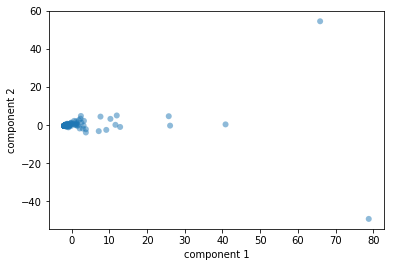

In [107]:
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA

# PCA
pca = PCA()
projected = pca.fit_transform(df_scaled)

plt.scatter(projected[:, 0], projected[:, 1],edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')

(b) (2pts) Find the names of the six countries with the highest first component (these should be clear outliers).

In [108]:
from operator import itemgetter

pc1_countries = list(zip(df.index,projected[:,0]))
sorted(pc1_countries,key=itemgetter(1),reverse = True)[:6]

[('China', 78.80851193282945),
 ('Canada', 65.90473298689562),
 ('Mexico', 40.81263272249104),
 ('Japan', 26.098580976339722),
 ('Germany', 25.743292922977588),
 ('Italy', 12.843228518092106)]

(c) (3pts) Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  If you are using sklearn's PCA implementation, you may use the output attribute *explained variance ratio*.  


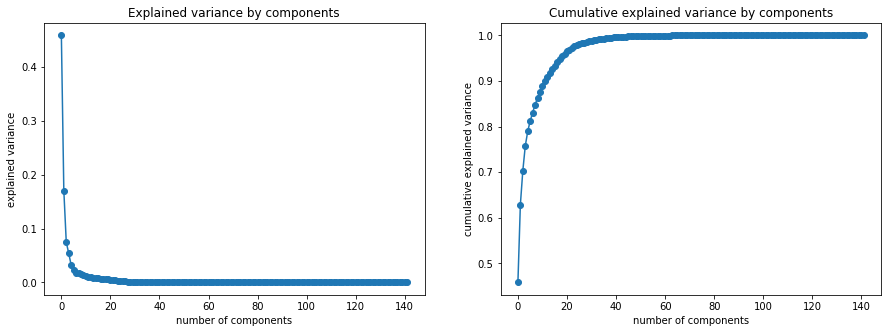

In [109]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
ax1.plot(pca.explained_variance_ratio_,marker ='o')
ax1.set_xlabel('number of components')
ax1.set_ylabel('explained variance');
ax1.set_title('Explained variance by components');

ax2.plot(np.cumsum(pca.explained_variance_ratio_),marker ='o')
ax2.set_xlabel('number of components')
ax2.set_ylabel('cumulative explained variance');
ax2.set_title('Cumulative explained variance by components');

(d) (2pts) How many principal components are required to explain cumulative variance of 30%, 60%, and 90%, respectively?


In [110]:
def components(cumulative_variance):
    for i,value in enumerate(np.cumsum(pca.explained_variance_ratio_)):
        if value > cumulative_variance :
            break
    return i+1
print('Components for 30% cumulative variance :',components(0.3))
print('Components for 60% cumulative variance :',components(0.6))
print('Components for 90% cumulative variance :',components(0.9))

Components for 30% cumulative variance : 1
Components for 60% cumulative variance : 2
Components for 90% cumulative variance : 13


# Question 5. PCA (conceptual) (10pts)

(a) (5pts) Give two reasons why we might want to use PCA.
1. Often while analyzing high dimensional data, it becomes difficult to infer the results. PCA will help in **reducing the dimensionality of the data and visualize the combined effects of the variables on 2 dimensions**. Using PCA also, helps in the clustering process of unsupervised learning, where different entities with similarities tend to move towards each other. Component 1 and component 2 of a PCA will help in clearly visualizing these clusters on a 2D dimensional graph.  
2. PCA is also used to address the **multicollinearity issue** in the independent variables. By applying PCA on the multicollinear independent variables, we can get a set of principal components that explains most of the variance and that are not uncorrelated. These can be used in any supervised regression model to come up with accurate predictions as the multicollinearity issue is addressed in the model.

(b) (5pts) If we approach PCA using eigenvalue decomposition on the covariance matrix, explain what the eigenvectors and eigenvalues represent.  

Eigenvalue decomposition on the covariance matrix gives both eigen values and eigen vectors.  

Finding the eigenvectors and eigenvalues of the covariance matrix is the equivalent of fitting the straight, principal-component lines to the variance of the data. We know that the eigenvectors trace the principal lines of force, and the axes of greatest variance and covariance illustrate where the data is most susceptible to change. 

Eigenvalues are simply the coefficients attached to eigenvectors, which give the axes magnitude. In this case, they are the measure of the data’s covariance. By ranking the eigenvectors in order of their eigenvalues, highest to lowest, we get the principal components in order of significance.  
